In [2]:
import laspy
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path

In [3]:
inFile = laspy.file.File('clouds/second_km.las')
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()
dataset.shape

(1147, 3)

In [4]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step
n = 10 
dataset_Z_filtered = dataset[[0]]
zfiltered = (dataset[:, 2].max()-dataset[:, 2].min())/10 #setting height filtered from ground
print('zfiltered =', zfiltered)


zfiltered = 0.2166000000000004


In [5]:
xstep = (dataset[:, 0].max()-dataset[:, 0].min())/n
ystep = (dataset[:, 1].max()-dataset[:, 1].min())/n
for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):
  for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):
    datasetfiltered = dataset[(dataset[:,0] > x)
                             &(dataset[:, 0] < x+xstep)
                             &(dataset[:, 1] > y)
                             &(dataset[:, 1] < y+ystep)]
    if datasetfiltered.shape[0] > 0:
      datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                        >(datasetfiltered[:, 2].min()+ zfiltered)]
      if datasetfiltered.shape[0] > 0:
        dataset_Z_filtered = np.concatenate((dataset_Z_filtered,
                                             datasetfiltered))
print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

dataset_Z_filtered shape (230, 3)


In [6]:
#Exploration
print('Examining Point Format: ')
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time
red
green
blue


In [7]:
type(pointformat) 

laspy.util.Format

In [8]:
print('Z range =', dataset[:, 2].max()-dataset[:, 2].min())
print('Z max =', dataset[:, 2].max(), 'Z min =', dataset[:, 2].min())
print('Y range =', dataset[:, 1].max()-dataset[:, 1].min())
print('Y max =', dataset[:, 1].max(), 'Y min =', dataset[:, 1].min())
print('X range =', dataset[:, 0].max()-dataset[:, 0].min())
print('X max =', dataset[:, 0].max(), 'X min =', dataset[:, 0].min())

Z range = 2.166000000000004
Z max = 43.203 Z min = 41.037
Y range = 0.9890000000596046
Y max = 6144624.389 Y min = 6144623.4
X range = 1.2349999999860302
X max = 474842.785 X min = 474841.55


In [9]:
#Normalization
dataset = preprocessing.normalize(dataset)

In [10]:
#Clustering
#clustering = DBSCAN(eps=0.1, min_samples=1, leaf_size=1, n_jobs=-1).fit(dataset)
#clustering = DBSCAN(eps=0.2, min_samples=5,algorithm='kd_tree', leaf_size=30).fit(dataset)
clustering = DBSCAN(eps=0.2, min_samples=10,algorithm='ball_tree', leaf_size=20).fit(dataset)

In [11]:
#vizualizing the results
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

In [12]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


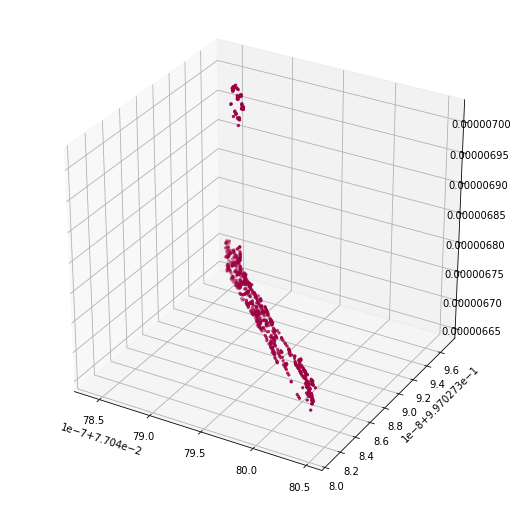

In [13]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(222, projection='3d')
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    col = [0, 0, 0, 1]
  class_member_mask = (labels == k)
  xyz = dataset[class_member_mask & core_samples_mask]
  ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker='.')
plt.show()